Minimise the free energy instead of Internal Energy and Entropy separate.

In [86]:
# Import necessary libraries
import numpy as np
import glob

# Import external background functions
%run background_functions.py

In [3]:
# Import HCP data
# Importing all matrices with Numpy
matrices = [np.genfromtxt(file) for file in glob.glob('./1000_Functional_Connectomes/Connectivity matrices/*_matrix_file.txt')]

# Generate an averaged matrix
MatAv = np.zeros(shape=matrices[0].shape)
for matrix in matrices:
    MatAv += matrix
averaged_matrix = MatAv/len(matrices)

In [6]:
# Define desired settings
cutoff=0.5 # Value between 0 and 1. Values below this value are set to zero. Becomes obsolete after including phase randomisation
max_dim=4
M = averaged_matrix

In [87]:
U_min, p_Umin, S_max, p_Smax, Free_energy = computing_functionals(M,cutoff,max_dim)

In [90]:
list_size = len(inverse_connectivity_matrix)
num_iterations = 10
sampling_distributions = ['uniform', 'normal', 'poisson', 'chisquare', 'gamma', 'pareto', 'lognormal']
initial_probabilities = generate_probability_list(list_size, sampling_distributions[5])

free_energy_history, f_probabilities = simulated_annealing_free_energy(initial_probabilities, sampling_distributions[5], -0.1, inverse_connectivity_matrix, num_iterations, initial_temperature=1.0, cooling_rate=0.95)

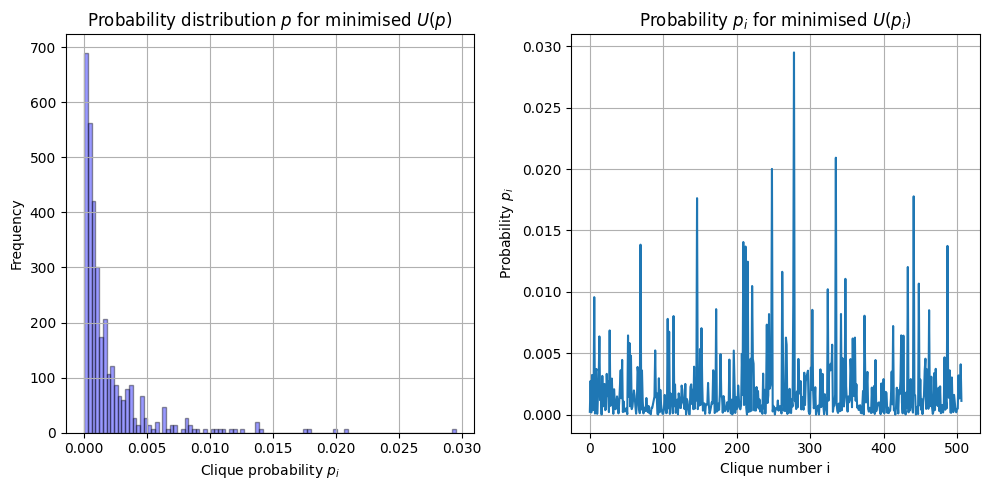

In [91]:
# Plotting the probability distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(f_probabilities, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black')
plt.xlabel('Clique probability $p_i$')
plt.ylabel('Frequency')
plt.title('Probability distribution $p$ for minimised $U(p)$')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(f_probabilities)
plt.xlabel('Clique number i')
plt.ylabel('Probability $p_i$')
plt.title('Probability $p_i$ for minimised $U(p_i)$')
plt.grid(True)

plt.tight_layout()
plt.show()

In [79]:
# Example for generating energy and entropy data from a given matrix
list_size = len(inverse_connectivity_matrix)
num_iterations = 1000
sampling_distributions = ['uniform', 'normal', 'chisquare', 'gamma', 'pareto', 'lognormal']
free_energy_probabilities = []

for _ in sampling_distributions:
    initial_probabilities = generate_probability_list(list_size, _)
    # Minimum internal energy with simulated annealing
    free_energy_history, current_probabilities_energy = simulated_annealing_free_energy(initial_probabilities, _, -0.1, inverse_connectivity_matrix, num_iterations, initial_temperature=1.0, cooling_rate=0.95)
    # Store probabilities type
    free_energy_probabilities.append(free_energy_history)

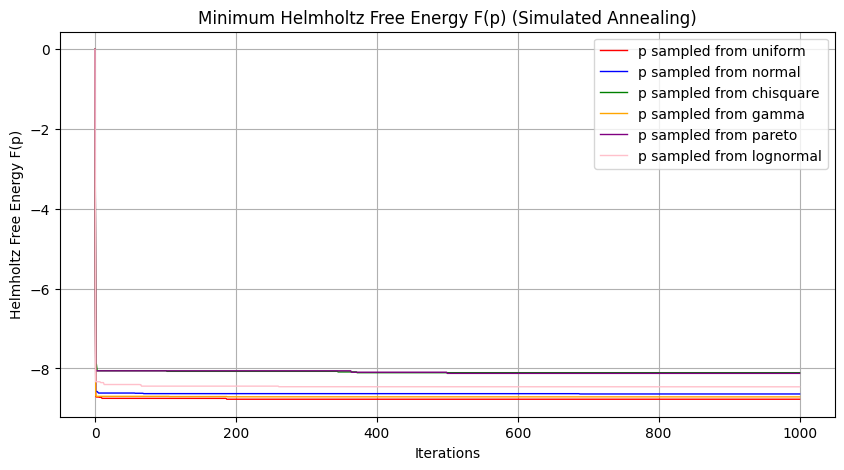

In [80]:
# Plotting the optimisation side by side
plt.figure(figsize=(10, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plot the energy/entropy evolution against the number of Simulated Annealing iterations

for i in range(len(sampling_distributions)):
    plt.plot(free_energy_probabilities[i], color=colors[i], linestyle='-', linewidth=1, label = f'p sampled from {sampling_distributions[i]}')
plt.title('Minimum Helmholtz Free Energy F(p) (Simulated Annealing)')
plt.xlabel('Iterations')
plt.ylabel('Helmholtz Free Energy F(p)')
plt.legend()
plt.grid(True)
plt.show()

In [59]:
def computing_functionals_1(matrix, cutoff, max_dim):
    clique_complex = build_clique_complex(matrix, cutoff, max_dim)
    inverse_connectivity_matrix = generate_inverse_connectivity_matrix(clique_complex)
    initial_probabilities = generate_probability_list(len(inverse_connectivity_matrix), sampling_distributions[0])
    free_energy_history, f_probabilities = simulated_annealing_free_energy(initial_probabilities, sampling_distributions[0], -0.1, inverse_connectivity_matrix, 10, initial_temperature=1.0, cooling_rate=0.95)
    return free_energy_history[-1]

In [21]:
cutoff = 0.5
max_dim = 3
matrix = matrices[0]

%time computing_functionals(matrix, cutoff, max_dim)

CPU times: total: 1.2 s
Wall time: 1.15 s


-10.14351452752098

In [69]:
free_energy_solo = []
free_energy_team = []
cutoff = 0.8
max_dim = 4

for matrix in matrices:
    free_energy_subject_1 = computing_functionals_1(matrix, cutoff, max_dim)
    free_energy_solo.append(free_energy_subject_1)
    U_min, p_Umin, S_max, p_Smax, free_energy_subject_2 = computing_functionals(matrix,cutoff,max_dim)
    free_energy_team.append(free_energy_subject_2)


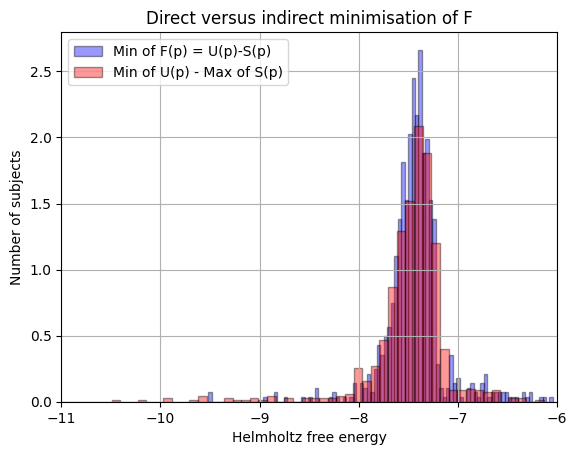

In [77]:
plt.hist(free_energy_solo, bins=100, density=True, alpha=0.4, color='blue', edgecolor='black', label= 'Min of F(p) = U(p)-S(p)')
plt.hist(free_energy_team, bins=100, density=True, alpha=0.4, color='red', edgecolor='black', label = 'Min of U(p) - Max of S(p)')
plt.xlim(-11, -6)
plt.grid(True)
plt.title('Direct versus indirect minimisation of F')
plt.ylabel('Number of subjects')
plt.xlabel('Helmholtz free energy')
plt.legend()
plt.show()

Why does the direct method converge so much faster (almost instanteneously) compared to the indirect method? And if the direct method is truly close to the minimal free energy, why is there no convergence between distribution types?